In [1]:
#Air Quality Prediction using Machine Learning

In [2]:
#Importing dependencies
import numpy as np #used to create several NumPy arrays
import pandas as pd #used for creating data frame
import matplotlib.pyplot as plt



The values in this dataset, "AirQualityUCI.csv," are separated using ";", which is why we specify sep=';'.

Additionally, some columns contain decimal numbers formatted with a comma (,), so we set decimal=',' to correctly interpret them.


In [3]:
# load the dataset from csv to pandas
air_quality = pd.read_csv('//home/rim/Desktop/project/AirQualityUCI.csv',sep=';',decimal=',')
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
air_quality.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

The dataset contains 114 missing values in all main columns, while two unnamed columns are entirely empty with 9,471 missing values each. These should be handled before analysis.

In [5]:
# remove last two columns since they have no use 
air_quality = air_quality.iloc[:,:-2]
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
air_quality.shape

(9471, 15)

This DataFrame has 9,471 rows and 15 columns, but the last valid data point is at index 9,356. The remaining rows contain null values, so we need to remove them.
Since the last valid index is 9,356, it corresponds to row 9,357 in a 1-based counting system.

In [7]:
air_quality.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [8]:
# take the first 9356 rows 
air_quality = air_quality.head(9357)
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [9]:
air_quality.shape 

(9357, 15)

In [10]:
#Checking if we still have missing values
air_quality.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Now, there are no null values in the DataFrame. The null count for all columns is zero, confirming that the dataset is clean... or is it?

In [11]:
air_quality.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

This is used to identify missing or invalid data, as -200 might be a placeholder for missing values in the dataset.

To handle the missing value we need to convert all missing point from -200 to NaN 
then
replace all NaN values with the mean of that specific column


In [12]:
air_quality = air_quality.replace(to_replace =-200, value=np.NaN)

In [13]:
#Checking if we still have missing values
air_quality.isnull().sum()
#Now, if we check for missing values again, we can see that all previously hidden missing values (which were -200) have been replaced with NaN and are now correctly detected.

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [14]:
# get the mean of each column
air_quality.mean(numeric_only=True)


CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [15]:
#replace missing value with mean value

In [16]:
air_quality = air_quality.fillna(air_quality.mean(numeric_only=True))
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [17]:
air_quality.isnull().sum()
air_quality.info

<bound method DataFrame.info of             Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0  150.000000      11.9   
1     10/03/2004  19.00.00     2.0       1292.0  112.000000       9.4   
2     10/03/2004  20.00.00     2.2       1402.0   88.000000       9.0   
3     10/03/2004  21.00.00     2.2       1376.0   80.000000       9.2   
4     10/03/2004  22.00.00     1.6       1272.0   51.000000       6.5   
...          ...       ...     ...          ...         ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0  218.811816      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0  218.811816      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0  218.811816      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0  218.811816       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0  218.811816      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0   

In [18]:
print(air_quality['Time'].head())


0    18.00.00
1    19.00.00
2    20.00.00
3    21.00.00
4    22.00.00
Name: Time, dtype: object


In [19]:
print(air_quality['Date'].head(10))


0    10/03/2004
1    10/03/2004
2    10/03/2004
3    10/03/2004
4    10/03/2004
5    10/03/2004
6    11/03/2004
7    11/03/2004
8    11/03/2004
9    11/03/2004
Name: Date, dtype: object


The first step was to understand our data and handle missing values to prevent any noise in our analysis.

The next step is to apply time-series forecasting methods to predict air quality levels.

Forecasting with FB prophet algorithm 
https://facebook.github.io/prophet/docs/quick_start.html

In [20]:
# Convert Date column to datetime with day-first format
date_info = pd.to_datetime(air_quality['Date'], dayfirst=True)

# Print first few values to check
print(date_info.head())




0   2004-03-10
1   2004-03-10
2   2004-03-10
3   2004-03-10
4   2004-03-10
Name: Date, dtype: datetime64[ns]


In [21]:
# Convert the Time column (HH.MM.SS to HH:MM:SS format)
time_info = air_quality['Time']


In [22]:
print(time_info)

0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9352    10.00.00
9353    11.00.00
9354    12.00.00
9355    13.00.00
9356    14.00.00
Name: Time, Length: 9357, dtype: object


In [23]:
time_info = time_info.apply(lambda x:x.replace('.',':'))

In [24]:
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [25]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# combining 2 series to a pandas dataframe
date_time = pd.concat([date_info,time_info],axis=1)

In [27]:
date_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [ ]:
# combining date and time 
date_time['ds']= date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)

In [29]:
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [30]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


we have to convert ds from datatype to datetime format

In [31]:
date_time['ds'] = pd.to_datetime(date_time['ds'])

In [32]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 219.4+ KB


In [ ]:
data_co = pd.DataFrame()
data_co['ds'] = pd.to_datetime(date_time['ds'])
data_co['y'] = air_quality['CO(GT)']


In [ ]:
data_nox = pd.DataFrame()
data_nox['ds'] = pd.to_datetime(date_time['ds'])
data_nox['y'] = air_quality['NOx(GT)']


In [35]:
data_co.head()

,ds,y
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


In [36]:
data_nox.head()

,ds,y
0,2004-03-10 18:00:00,166.0
1,2004-03-10 19:00:00,103.0
2,2004-03-10 20:00:00,131.0
3,2004-03-10 21:00:00,172.0
4,2004-03-10 22:00:00,131.0


In [37]:
from prophet import Prophet

In [ ]:
#  Initialize the Prophet model
model_co = Prophet()
model_co.fit(data_co)

18:19:50 - cmdstanpy - INFO - Chain [1] start processing
18:19:50 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
# Model for NOx(GT)
model_nox = Prophet()
model_nox.fit(data_nox)

18:19:50 - cmdstanpy - INFO - Chain [1] start processing
18:19:51 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
#  Create future timestamps
future_co = model_co.make_future_dataframe(periods=365, freq='h')



In [ ]:
# Create future timestamps
future_nox = model_co.make_future_dataframe(periods=365, freq='h')


In [42]:
#  Generate predictions
forecast_co = model_co.predict(future_co)

#  Display the results
print(forecast_co[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                      ds      yhat  yhat_lower  yhat_upper
9717 2005-04-19 15:00:00  1.902328    0.518454    3.266286
9718 2005-04-19 16:00:00  2.142878    0.792307    3.474480
9719 2005-04-19 17:00:00  2.554207    1.161535    3.844315
9720 2005-04-19 18:00:00  2.991605    1.606288    4.348169
9721 2005-04-19 19:00:00  3.207758    1.942477    4.615181


In [43]:
#  Generate predictions
forecast_nox = model_nox.predict(future_nox)

#  Display the results
print(forecast_nox[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                      ds        yhat  yhat_lower  yhat_upper
9717 2005-04-19 15:00:00  258.964801   80.292376  447.126660
9718 2005-04-19 16:00:00  276.380247   89.645514  461.215664
9719 2005-04-19 17:00:00  304.789217  127.316451  507.155634
9720 2005-04-19 18:00:00  338.288942  140.628161  520.447323
9721 2005-04-19 19:00:00  358.814182  174.705939  558.182082



 Plot the forecasts

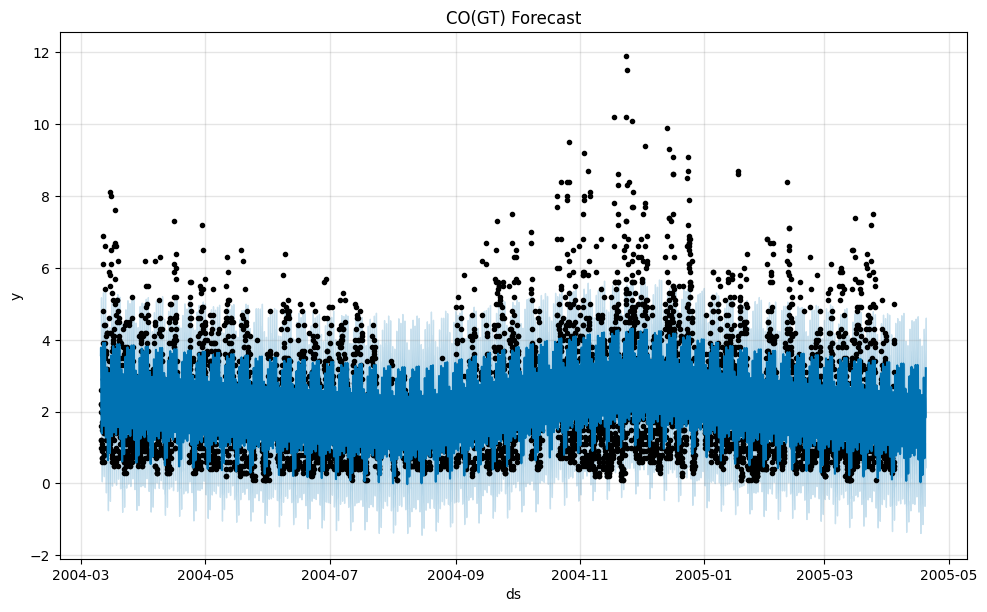

In [ ]:
# Plot for CO(GT)
fig_co = model_co.plot(forecast_co)
plt.title('CO(GT) Forecast')
plt.show()

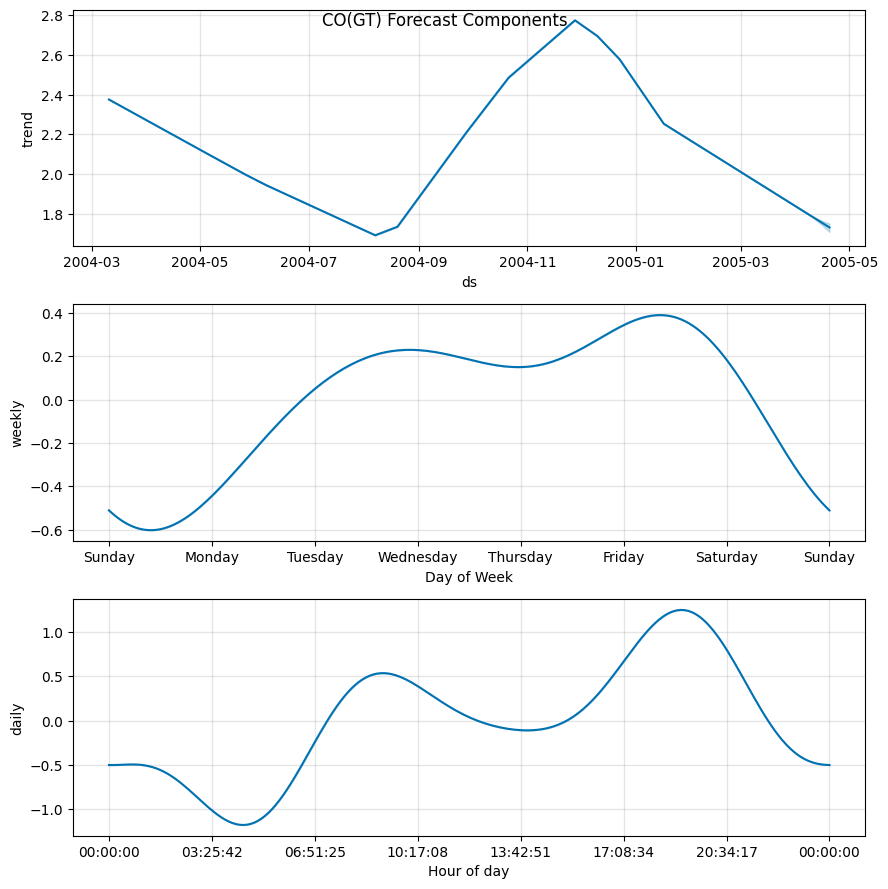

In [45]:
fig_components_co = model_co.plot_components(forecast_co)
plt.suptitle('CO(GT) Forecast Components')
plt.show()

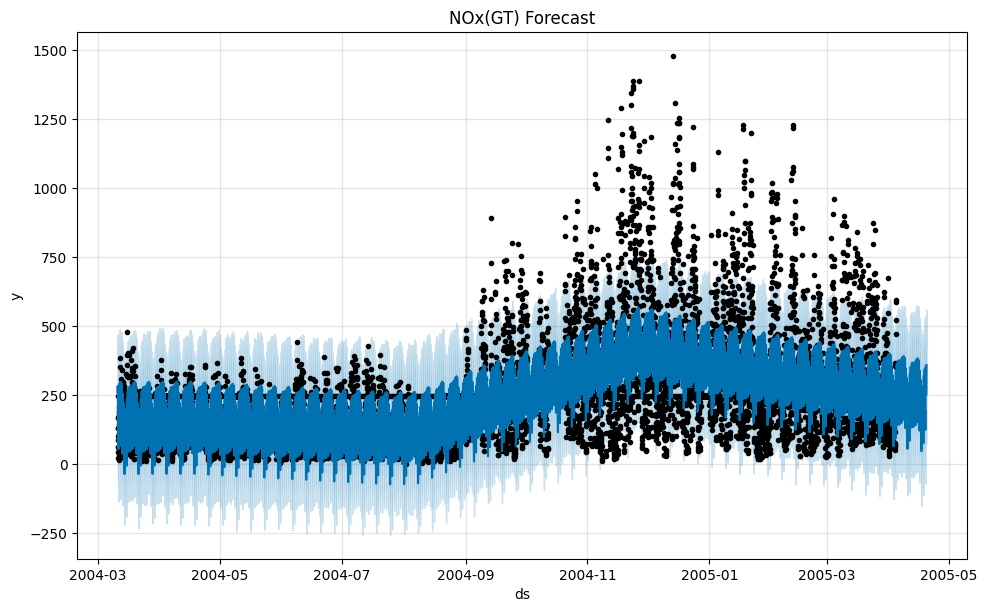

In [ ]:
# Plot for NOx(GT)
fig_nox = model_nox.plot(forecast_nox)
plt.title('NOx(GT) Forecast')
plt.show()

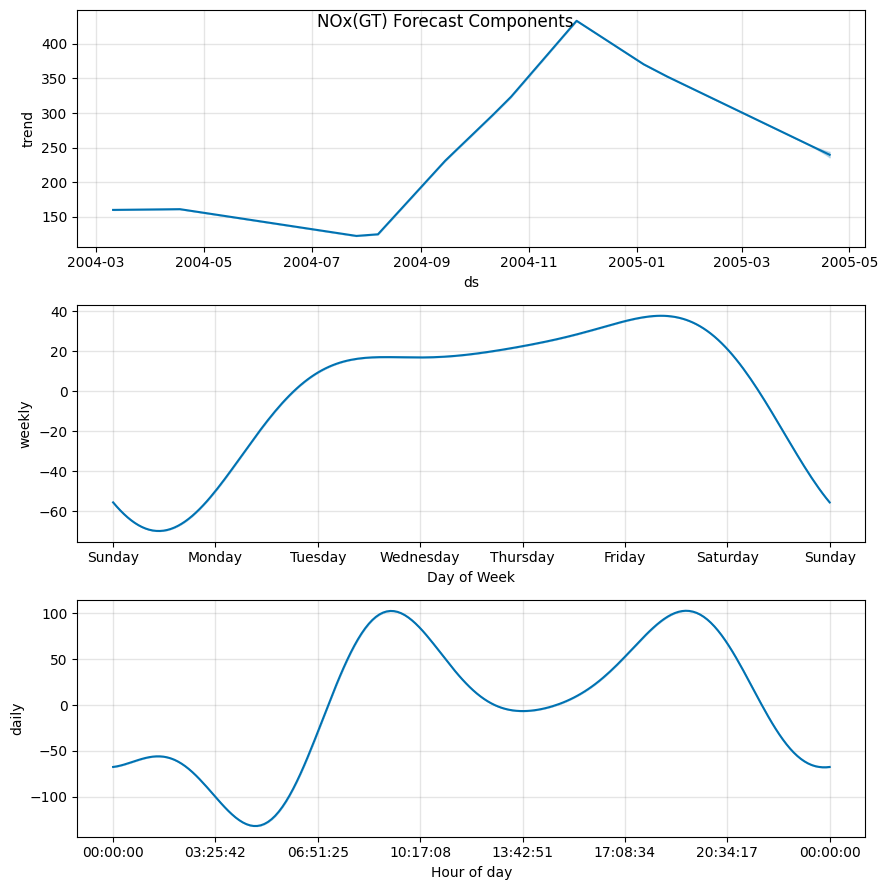

In [47]:
fig_components_nox = model_nox.plot_components(forecast_nox)
plt.suptitle('NOx(GT) Forecast Components')
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



In [49]:
df=air_quality

In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Replace '.' with ':' in the Time column and convert to datetime.time
df['Time'] = pd.to_datetime(df['Time'].str.replace('.', ':'), format='%H:%M:%S').dt.time

# Combine Date and Time into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Extract useful features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

# Drop unnecessary columns
df = df.drop(columns=['Date', 'Time', 'DateTime'])

# Display the updated DataFrame
print(df.head())

   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Year  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  2004   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  2004   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  2004   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  2004   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  2004   

   Month  Day  Hour  
0      3   10    18  
1      3   10    19  
2      3   10    20  
3   

In [51]:
import numpy as np

# Generate synthetic PM10 and PM2.5 (using a simple formula for illustration)
np.random.seed(42)

df['PM10'] = (
    df['CO(GT)'] * 0.1 +
    df['NOx(GT)'] * 0.5 +
    df['NMHC(GT)'] * 0.3 +
    np.random.normal(0, 5, len(df))  
)

df['PM2.5'] = (
    df['CO(GT)'] * 0.2 +
    df['NMHC(GT)'] * 0.4 +
    df['NO2(GT)'] * 0.1 +
    np.random.normal(0, 5, len(df))  
)

# Step 2: Prepare the feature set and target variables
features = ['CO(GT)', 'NOx(GT)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 
            'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day', 'Hour']
target_pm10 = 'PM10'
target_pm25 = 'PM2.5'

# Split the dataset into train and test sets
X = df[features]  # Features
y_pm10 = df[target_pm10]  # Target PM10
y_pm25 = df[target_pm25]  # Target PM2.5

X_train, X_test, y_train_pm10, y_test_pm10 = train_test_split(X, y_pm10, test_size=0.2, random_state=42)
X_train, X_test, y_train_pm25, y_test_pm25 = train_test_split(X, y_pm25, test_size=0.2, random_state=42)

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required at each leaf node
}

#  Initialize GridSearchCV
grid_search_pm10 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),  # Base model
    param_grid=param_grid,                             # Parameter grid
    cv=3,                                              # Number of cross-validation folds
    scoring='neg_mean_squared_error',                  # Scoring metric (negative MSE)
    n_jobs=-1                                          # Use all available CPU cores
)

#  Perform the grid search for PM10
grid_search_pm10.fit(X_train, y_train_pm10)

#  Get the best hyperparameters for PM10
best_params_pm10 = grid_search_pm10.best_params_
print("Best Hyperparameters for PM10:", best_params_pm10)

#  Train the final model with the best hyperparameters for PM10
best_rf_pm10 = grid_search_pm10.best_estimator_
best_rf_pm10.fit(X_train, y_train_pm10)

#  Evaluate the tuned model on the test set for PM10
y_pred_pm10 = best_rf_pm10.predict(X_test)
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_test_pm10, y_pred_pm10)
r2_pm10 = r2_score(y_test_pm10, y_pred_pm10)

print("\nPM10 Test Performance (After Tuning):")
print(f"R2 Score: {r2_pm10}")
print(f"MAE: {mae_pm10}")
print(f"MSE: {mse_pm10}")

#  process for PM2.5
grid_search_pm25 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_pm25.fit(X_train, y_train_pm25)

best_params_pm25 = grid_search_pm25.best_params_
print("\nBest Hyperparameters for PM2.5:", best_params_pm25)

best_rf_pm25 = grid_search_pm25.best_estimator_
best_rf_pm25.fit(X_train, y_train_pm25)

y_pred_pm25 = best_rf_pm25.predict(X_test)
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)
r2_pm25 = r2_score(y_test_pm25, y_pred_pm25)

print("\nPM2.5 Test Performance (After Tuning):")
print(f"R2 Score: {r2_pm25}")
print(f"MAE: {mae_pm25}")
print(f"MSE: {mse_pm25}")

#  Add the predicted PM10 and PM2.5 as new columns in the original dataset
df['Predicted_PM10'] = best_rf_pm10.predict(X)
df['Predicted_PM2.5'] = best_rf_pm25.predict(X)

#  Save the predictions to a CSV file for real-time monitoring
df[['Year', 'Month', 'Day', 'Hour', 'Predicted_PM10', 'Predicted_PM2.5']].to_csv('predicted_pm_values.csv', index=False)

Best Hyperparameters for PM10: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

PM10 Test Performance (After Tuning):
R2 Score: 0.9959631422925194
MAE: 4.4281992176502385
MSE: 40.785153042167124

Best Hyperparameters for PM2.5: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

PM2.5 Test Performance (After Tuning):
R2 Score: 0.9706268734362098
MAE: 4.032264465952515
MSE: 25.847792615358284


In [ ]:
# Predict using the trained models on both training and test sets
y_pred_train_pm10 = best_rf_pm10.predict(X_train)
y_pred_test_pm10 = best_rf_pm10.predict(X_test)

y_pred_train_pm25 = best_rf_pm25.predict(X_train)
y_pred_test_pm25 = best_rf_pm25.predict(X_test)

In [53]:
import joblib
joblib.dump(best_rf_pm10, "C:\\Users\\HP\\Desktop\\Group13\\aqi\\best_rf_pm10.pkl")
joblib.dump(best_rf_pm25, "C:\\Users\\HP\\Desktop\\Group13\\aqi\\best_rf_pm25.pkl")


['C:\\Users\\HP\\Desktop\\Group13\\aqi\\best_rf_pm25.pkl']

In [54]:


# Calculate evaluation metrics for PM10 (Training and Test performance)
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# PM10 Performance
mse_train_pm10, mae_train_pm10, r2_train_pm10 = calculate_metrics(y_train_pm10, y_pred_train_pm10)
print("PM10 Training Performance:")
print(f"R2 Score: {r2_train_pm10}")
print(f"MAE: {mae_train_pm10}")
print(f"MSE: {mse_train_pm10}")

mse_test_pm10, mae_test_pm10, r2_test_pm10 = calculate_metrics(y_test_pm10, y_pred_test_pm10)
print("\nPM10 Test Performance:")
print(f"R2 Score: {r2_test_pm10}")
print(f"MAE: {mae_test_pm10}")
print(f"MSE: {mse_test_pm10}")

# PM2.5 Performance
mse_train_pm25, mae_train_pm25, r2_train_pm25 = calculate_metrics(y_train_pm25, y_pred_train_pm25)
print("\nPM2.5 Training Performance:")
print(f"R2 Score: {r2_train_pm25}")
print(f"MAE: {mae_train_pm25}")
print(f"MSE: {mse_train_pm25}")

mse_test_pm25, mae_test_pm25, r2_test_pm25 = calculate_metrics(y_test_pm25, y_pred_test_pm25)
print("\nPM2.5 Test Performance:")
print(f"R2 Score: {r2_test_pm25}")
print(f"MAE: {mae_test_pm25}")
print(f"MSE: {mse_test_pm25}")


PM10 Training Performance:
R2 Score: 0.9981535644442125
MAE: 3.3750949098943708
MSE: 18.691559423869293

PM10 Test Performance:
R2 Score: 0.9959631422925194
MAE: 4.4281992176502385
MSE: 40.785153042167124

PM2.5 Training Performance:
R2 Score: 0.9691032087164447
MAE: 3.6648254855544518
MSE: 21.694379102601054

PM2.5 Test Performance:
R2 Score: 0.9706268734362098
MAE: 4.032264465952515
MSE: 25.847792615358284


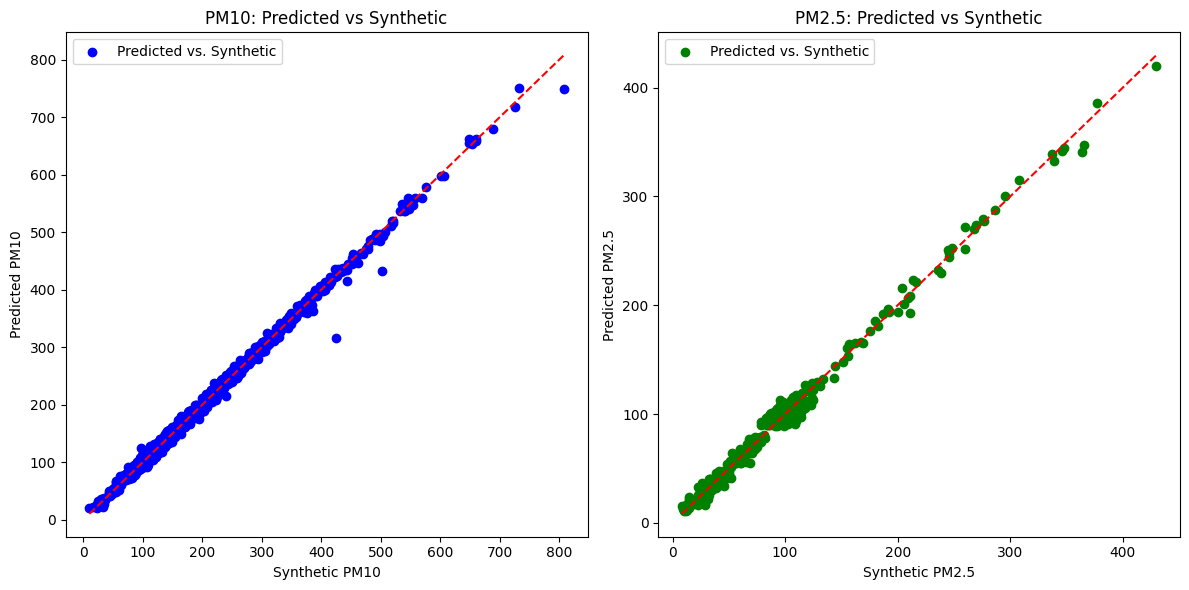

In [55]:
import matplotlib.pyplot as plt

# Step 1: Plot PM10 predictions vs. synthetic (true) values
plt.figure(figsize=(12, 6))

# Plot for PM10
plt.subplot(1, 2, 1)
plt.scatter(y_test_pm10, y_pred_pm10, color='blue', label='Predicted vs. Synthetic')
plt.plot([y_test_pm10.min(), y_test_pm10.max()], [y_test_pm10.min(), y_test_pm10.max()], color='red', linestyle='--')
plt.title('PM10: Predicted vs Synthetic')
plt.xlabel('Synthetic PM10')
plt.ylabel('Predicted PM10')
plt.legend()

# Step 2: Plot PM2.5 predictions vs. synthetic (true) values
plt.subplot(1, 2, 2)
plt.scatter(y_test_pm25, y_pred_pm25, color='green', label='Predicted vs. Synthetic')
plt.plot([y_test_pm25.min(), y_test_pm25.max()], [y_test_pm25.min(), y_test_pm25.max()], color='red', linestyle='--')
plt.title('PM2.5: Predicted vs Synthetic')
plt.xlabel('Synthetic PM2.5')
plt.ylabel('Predicted PM2.5')
plt.legend()

# Step 3: Display the plot
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

# AQI Breakpoints for PM2.5 and PM10
breakpoints = {
    "PM2.5": [
        (0, 12, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500)
    ],
    "PM10": [
        (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 504, 301, 400),
        (505, 604, 401, 500)
    ]
}

def calculate_aqi(concentration, pollutant):
    """Calculate AQI for PM2.5 or PM10 using breakpoints."""
    for c_low, c_high, i_low, i_high in breakpoints[pollutant]:
        if c_low <= concentration <= c_high:
            aqi = ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
            return round(aqi)
    return 500  # Max AQI if beyond range

def adjust_aqi(aqi_pm25, aqi_pm10, RH, Temp, Wind):
    """Adjust AQI based on environmental factors."""
    final_aqi = max(aqi_pm25, aqi_pm10)

    # Humidity Adjustment
    if RH > 80:
        final_aqi *= 1.1  # Increase AQI by 10%
    elif RH < 30:
        final_aqi *= 0.9  # Decrease AQI by 10%

    # Temperature Adjustment
    if Temp > 40 or Temp < 0:
        final_aqi *= 1.05  # Increase AQI slightly

    # Wind Speed Adjustment
    if Wind > 15:
        final_aqi *= 0.8  # Strong winds reduce pollution impact

    return round(min(final_aqi, 500))  # Ensure AQI is within limits

# Example Data
pm25 = 22.15  # µg/m³
pm10 = 41.18 # µg/m³
RH = 74  # % humidity
Temp = 8  # °C
Wind = 1  # m/s

# Calculate AQI
aqi_pm25 = calculate_aqi(pm25, "PM2.5")
aqi_pm10 = calculate_aqi(pm10, "PM10")

# Adjust AQI with environmental factors
final_aqi = adjust_aqi(aqi_pm25, aqi_pm10, RH, Temp, Wind)

print(f"PM2.5 AQI: {aqi_pm25}, PM10 AQI: {aqi_pm10}, Final Adjusted AQI: {final_aqi}")



PM2.5 AQI: 72, PM10 AQI: 38, Final Adjusted AQI: 72


In [2]:
def classify_air_quality(aqi):
    """Classifies air quality based on AQI index and assigns an emoji."""
    if not isinstance(aqi, (int, float)):  # Ensure AQI is a number
        return "Invalid AQI value ❌"

    if aqi <= 50:
        return "Good 😊 ✅"
    elif aqi <= 100:
        return "Moderate 😐 ☀️"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups 🤧 🌫️"
    elif aqi <= 200:
        return "Unhealthy 😷 🚨"
    elif aqi <= 300:
        return "Very Unhealthy 🤢 ☠️"
    else:
        return "Hazardous ☠️ 🚫"

# Example usage (single AQI value)

print(f"AQI: {final_aqi} - {classify_air_quality(final_aqi)}")


AQI: 72 - Moderate 😐 ☀️
